# 3. Clasificación

**Alumno:** Aguilera Luzania José Luis

## Contenido
---

**Introducción**
- ¿Qué es la detección de noticias falsas? (*Fake news*).
- Objetivo de la libreta.

**Procesamiento de los datos**
- Librerías
- Cargar el *corpus*
- Datos necesarios: *Text* y *Category*
- Palabras vacías o *stopwords*
- *Snowball Stemmer*
- Procesamiento del texto
- Vectorización y características TFIDF
- Separación de los conjuntos de datos

**Métricas**
- Matriz de confusión

**Naive Bayes Multinomial**
- Modelo
- Resultados

**Regresión Logística**
- Modelo
- Resultados

## Introducción
---

#### ¿Qué es la detección de noticias falsas (*fake news*)?
La detección de noticias falsas (Fake News) es la tarea de evaluar la veracidad de las afirmaciones en las noticias. Este es un problema crítico en el Procesamiento del Lenguaje Natural (PLN) porque tanto en medios de noticias tradicionales como en medios digitales las Fake News generan un gran impacto social y político en cada individuo. Por ejemplo, la exposición a las Fake News puede generar actitudes de ineficacia, alienación y cinismo hacia ciertos candidatos políticos (Balmas, 2014).

#### Objetivo de la libreta

El objetivo de esta libreta es mostrar el procesamiento necesario del texto para después ser usado en un clasificador de texto y utilizar distintos métodos para clasificar el texto.

## Procesamiento de los datos
---

#### Librerías

Manipulación de datos:
- `pandas`: Librería para manipular los datos de forma tabular.
- `numpy`: Librería para la manipulación de datos de forma numérica, vectorial.
- `re`: Librería para el uso de expresiones regulares.
- `cmd`: Librería para controlar el formato de impresión en la consola.

Procesamiento del lenguaje natural:
- `nltk`: Librería para utilizar técnicas de procesamiento del lenguaje natural.

Presentación de los datos:
- `matplotlib`: Librería para graficar.
- `seaborn`: Librería auxiliar para graficar.
- `wordcloud`: Librería para generar una nube de palabras y guardarla como imagen *.png*.

Inteligencia Artificial
- `sklearn`: Librería de herramientas para el procesamiento de los datos y creación de modelos para la clasificación del texto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

#### Datos adicionales para la librería `nltk`

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuisAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Cargar el corpus

In [3]:
corpus = pd.read_csv('Datos/corpus_spanish_v3.csv', encoding='utf-8', index_col=0)
corpus.head()

,Category,Topic,Source,Headline,Text,Link
0,True,Science,El país,La NASA recupera el contacto con un satélite d...,La NASA recupera el contacto con un satélite d...,https://elpais.com/elpais/2018/02/01/ciencia/1...
1,True,Economy,El financiero,AMLO aceleraría el consumo y el crecimiento ec...,AMLO aceleraría el consumo y el crecimiento ec...,http://www.elfinanciero.com.mx/economia/amlo-a...
2,Fake,Sport,actualidadpanamericana.com,Compañero de James se ‘calvea’ y le juega pesa...,Al borde de un colapso nervioso quedó el hábil...,http://www.actualidadpanamericana.com/companer...
3,Fake,Politics,actualidadpanamericana.com,Dian gravará este año a los niños que recojan ...,"Mediante pupitrazo de último minuto anoche, el...",http://www.actualidadpanamericana.com/dian-gra...
4,Fake,Politics,actualidadpanamericana.com,Uribe asegura que insultó 358 guerrilleros,Muy temprano esta mañana el expresidente y aho...,http://www.actualidadpanamericana.com/uribe-as...


#### Datos necesarios: *Text* y *Category*

In [4]:
X = corpus['Text']
y = corpus['Category']

y = y.astype("category").cat.codes

#### Palabras vacías o *stopwords*

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es).

In [5]:
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('Datos/stopwords-es.json')[0])

stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

#### *Snowball Stemmer*

In [6]:
snowball_stemmer = SnowballStemmer('spanish')

#### Procesamiento del texto

In [7]:
def process_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"http", "", text)
    text = re.sub("\n", " ", text)
    text = text.replace(r"*NUMBER*", "número")
    text = text.replace(r"*PHONE*", "número")
    text = text.replace(r"*EMAIL*", "email")
    text = text.replace(r"*URL*", "url")
    text = re.sub('[^ A-Za-z\dÁÉÍÓÚÑáéíóúñ/]+', ' ', text)
    text = text.lower()
    text = text.split()
    text = [snowball_stemmer.stem(word) for word in text if not word in stopwords_spanish]
    text = ' '.join(text)

    return text

# Procesar los textos
X = X.apply(process_text)

# Convertir los conjuntos a un numpy ndarray
X = X.values
y = y.values

#### Vectorización y características TFIDF

In [8]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(X).toarray()

#### Separación de los conjuntos de datos

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2021)

## Métricas
---

#### Matriz de confusión

In [10]:
def plot_confusion_matrix(y_test_values, y_predicted_values):
    cf_matrix = confusion_matrix(y_test_values, y_predicted_values)
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    fig, ax = plt.subplots(figsize = (7, 5.5))
    sns.heatmap(cf_matrix, annot = labels, ax = ax, fmt = '',cmap = 'Blues', annot_kws = {"size": 13})

    # Etiquetas, título y ticks
    label_font = {'size':'15'}
    ax.set_xlabel(' \nPredicción', fontdict = label_font)
    ax.set_ylabel('Valores reales\n', fontdict = label_font)

    title_font = {'size':'16'}
    ax.set_title('Matriz de confusión\n', fontdict = title_font)

    ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
    ax.xaxis.set_ticklabels(['Fake', 'Real'])
    ax.yaxis.set_ticklabels(['Fake', 'Real'])
    plt.show()

## Naive Bayes Multinomial
---


#### Introducción
El método blah, blah, blah, blah, blah

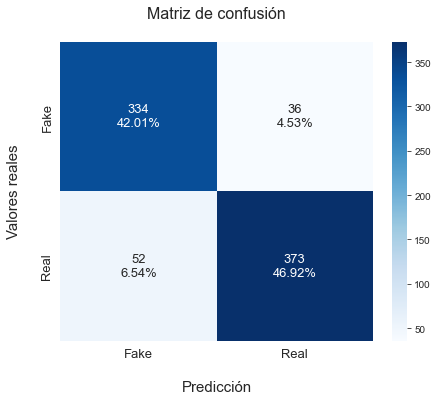

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       386
           1       0.88      0.91      0.89       409

    accuracy                           0.89       795
   macro avg       0.89      0.89      0.89       795
weighted avg       0.89      0.89      0.89       795



In [11]:
# Modelo ════════════════════════════════════════════════════
model_NB = MultinomialNB(alpha=0.5)
model_NB.fit(X_train, y_train)

# Predicción
y_predicted_NB = model_NB.predict(X_test)

# Resultados ════════════════════════════════════════════════
# Matriz de confusión
plot_confusion_matrix(y_predicted_NB, y_test)

# Reporte de clasificación
print(classification_report(y_test, y_predicted_NB))

## Regresión Logística
---

#### Introducción

El método blah, blah, blah, blah, blah

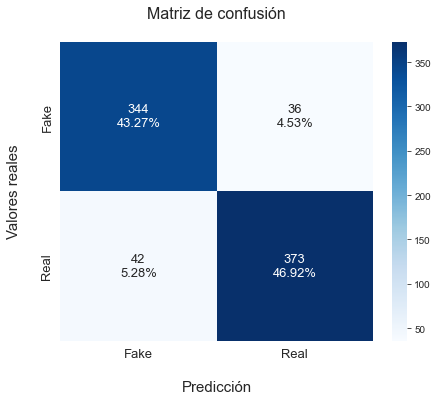

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       386
           1       0.90      0.91      0.91       409

    accuracy                           0.90       795
   macro avg       0.90      0.90      0.90       795
weighted avg       0.90      0.90      0.90       795



In [12]:
# Modelo ════════════════════════════════════════════════════
model_LR = LogisticRegression(max_iter=2000)
model_LR.fit(X_train, y_train)

# Predicción
y_predicted_LR = model_LR.predict(X_test)

# Resultados ════════════════════════════════════════════════
# Matriz de confusión
plot_confusion_matrix(y_predicted_LR, y_test)

# Reporte de clasificación
print(classification_report(y_test, y_predicted_LR))
